# 12. Causality - comparing 2 samples

The key idea is that when treatment and control groups are assigned randomly in such experiments, differences in outcomes can be attributed to the treatment if they are more pronounced than what would occur by chance.

## 1. Treating chronic back pain
#### Experimental set up
A randomized controlled trial (RCT) on treating chronic back pain using Botulinum Toxin A (BTA) is introduced. The RCT involved 31 patients randomly assigned to treatment and control groups, with 15 in the treatment group and 16 in control.. The control group received normal saline, and the trial was double-blind.

#### Results
After 8 weeks, the data is presented in a table (bta). It shows that 9 out of 15 patients in the treatment group and 2 out of 16 in the control group experienced pain relief. The proportions are calculated: 60% in the treatment group and 12.5% in the control group.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

bta = pd.read_csv('bta.csv')
bta.head()

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0


In [11]:
bta_count = bta.groupby('Group').sum('Result').reset_index()
bta_count

,Group,Result
0,Control,2.0
1,Treatment,9.0


In [20]:
bta_proportion = bta.groupby('Group')['Result'].mean().reset_index()
bta_proportion

,Group,Result
0,Control,0.125
1,Treatment,0.600


In the treatment group, 60% of the patients had pain relief, compared to only 12.5% in the control group. None of the patients suffered any side effects.

So the indications are that botulinum toxin A did better than the saline. But the conclusion isn’t yet a slam-dunk. The patients were assigned at random into the two groups, so perhaps the difference could just be due to chance?

To understand what this means, we have to consider the possibility that among the 31 patients in the study, some were simply better able to recover than others, even without any help from the treatment. What if an unusually large proportion of such patients got assigned to the treatment group, just by chance? Then even if the treatment did nothing more than the saline in the control group, the results of the treatment group might look better than those of the control group.

## 2. Potential outcomes
#### Concepts
Before randomization, each patient has two potential outcomes: one if assigned to the treatment group and another if assigned to the control group. The distribution of these potential outcomes is a crucial consideration.

#### Visualisation
The concept is visualized using the metaphor of two-sided tickets, where each patient has a ticket split into two halves representing potential outcomes.

#### Observed outcomes
A table (observed_outcomes) is introduced, showing observed outcomes (pain relief or not) for each patient in both groups, with one half of the ticket left blank.

In [26]:
observed_outcomes = pd.read_csv('observed_outcomes.csv')
observed_outcomes

,Group,Outcome if assigned treatment,Outcome if assigned control
0,Control,Unknown,1
1,Control,Unknown,1
2,Control,Unknown,0
3,Control,Unknown,0
4,Control,Unknown,0
5,Control,Unknown,0
6,Control,Unknown,0
7,Control,Unknown,0
8,Control,Unknown,0
9,Control,Unknown,0


## 3. Hypothesis testing
The null hypothesis suggests that the distribution of potential treatment outcomes is the same as potential control outcomes. In terms of the table observed_outcomes, the question is whether the distribution of the 31 “treatment” values in Column 1 (including the unknown ones) is different from the distribution of the 31 “control” values in Column 2 (again including the unknown ones).

**Null Hypothesis**: The distribution of all 31 potential “treatment” outcomes is the same as that of all 31 potential “control” outcomes. Botulinum toxin A does nothing different from saline; the difference in the two samples is just due to chance.

**Alternative Hypothesis**: The distribution of 31 potential “treatment” outcomes is different from that of the 31 control outcomes. The treatment does something different from the control.

There are 31 observed outcomes jointly in the two groups. **If the null hypothesis were true, it wouldn’t matter which of those 31 outcomes were labeled “treatment” and which “control.” Any random subset of 16 out of the 31 values could be called “control” and the remaining 15 “treatment”.**

The test statistic measures the distance between the proportions of outcomes in the treatment and control groups (comparison of means test since both are categorical).

In [38]:
observed_distance = abs(bta_proportion.loc[0, 'Result'] - bta_proportion.loc[1, 'Result'])
observed_distance

0.475

In this case, the absolute difference between 0.6 (treatment group) and 0.125 (control group) = 0.475.

## 4. Simulation & inference using permutation test
Simulating under the null hypothesis involves randomly permuting group labels and calculating the test statistic.

Repeating the simulation many times (20,000 in this case) to create a distribution of the test statistic under the null hypothesis.

Plan

1. [Distance 2 group proportions] Create a function that takes (1) name of data set, (2) the group column name -> return distance between average proportion (count in group/number of rows in group) of the 2 group.
2. [Shuffle -> Distance 2 group proportions] Create another function: shuffle the sample, call the 1st function again, append the results. Repeat n times.

In [65]:
# 1

def dist (data, group_column, result_column):
    proportions = data.groupby(group_column)[result_column].mean().reset_index()
    distance = abs(proportions.loc[0, result_column] - proportions.loc[1, result_column])
    return distance

# test
dist(bta, 'Group', 'Result')

0.475

,Simulation,Distance between proportions
0,1,0.345833
1,2,0.041667
2,3,0.087500
3,4,0.087500
4,5,0.087500


<Axes: xlabel='Distance between proportions', ylabel='Count'>

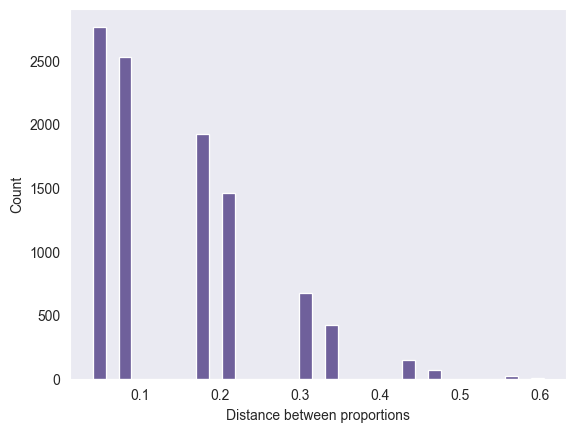

In [86]:
# 2

def simulation():
    data = []
    for i in range(1, rep + 1):
        # shuffle
        bta['Shuffled Result'] = bta['Result'].sample(frac=1, replace=False).reset_index(drop=True)
        # dist function
        dist_sim = dist(bta, 'Group', 'Shuffled Result')
        # append
        data.append({
            'Simulation': i,
            'Distance between proportions': dist_sim
        })
    datadf = pd.DataFrame(data)
    return datadf

# input
rep = int(input("Enter the number of simulations:"))
# call function & display table
resultsdf = simulation()
display(resultsdf.head(5))
# plot
sns.set_style('dark')
sns.set_palette('viridis')
sns.histplot(data = resultsdf, x = 'Distance between proportions')


In [89]:
p = np.count_nonzero(resultsdf['Distance between proportions'] >= observed_distance) / rep
p

0.0095

This is a small p-value. The observed statistic is in the tail of the empirical histogram of the test statistic generated under the null hypothesis.

The result is statistically significant. The test favors the alternative hypothesis over the null. The evidence supports the hypothesis that the treatment is doing something.

The study reports a P-value of 0.009, or 0.9%, which is not far from our empirical value.

## 5. Causality
#### Randomisation Importance:
Because the trial was randomised, the test provides evidence of causation. Random assignment minimises confounding variables.

#### Without Randomisation:
If randomisation hadn't occurred, associations might be observed, but causation wouldn't be as confidently established due to potential confounding factors.